<a href="https://colab.research.google.com/github/Otobi1/Board-Game-Prediction-End-to-End/blob/master/02_Board_Game_Prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Exploratory Data Analysis
# - Aim: is there a correlation between the board game's mechanics, the category, stats and the game's complexity, weight on the Board Game Geek website?

# Previously, we webscrapped the Board Game Geek website, for this part of the hands-on, we will use the kaggle competition dataset of the top 20k games on Board Game Geek. 


In [ ]:
# Import the necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

print ("Libraries successfully imported!!!")

Libraries successfully imported!!!


In [ ]:
# Importing the dataset of the top 20k games on Board Games Geek from https://www.kaggle.com/extralime/20000-boardgames-dataset
# You can download it to your local machine and just upload it into google colab as follows. 

from google.colab import files # https://colab.research.google.com/notebooks/io.ipynb#scrollTo=eikfzi8ZT_rW 
uploaded = files.upload()

for fn in uploaded.keys():
  print ("User uploaded file {name} with length {length} bytes". format(name = fn, length = len(uploaded[fn])))

Saving boardgames1.csv to boardgames1 (1).csv
User uploaded file boardgames1.csv with length 32781872 bytes


In [ ]:
# Load data

df = pd.read_csv("boardgames1.csv")
df.head()

,objectid,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,max_community,totalvotes,playerage,languagedependence,usersrated,average,baverage,stddev,avgweight,numweights,numgeeklists,numtrading,numwanting,numcomments,siteviews,numplays,numplays_month,news,blogs,weblink,podcast,label,boardgamedesigner_cnt,boardgameartist_cnt,boardgamepublisher_cnt,boardgamehonor_cnt,boardgamecategory_cnt,boardgamemechanic_cnt,boardgameexpansion_cnt,boardgameversion_cnt,boardgamefamily_cnt,boardgamedesigner,boardgameartist,boardgamepublisher,boardgamehonor,boardgamecategory,boardgameversion,boardgamemechanic,boardgameexpansion,boardgamefamily,description,gamelink
0,174430,Gloomhaven,2017,1,1,4,60,120,12,3.0,4.0,827,14,4,31254,8.85292,8.58424,1.59819,3.8078,1311,3657,313,1365,5972,8933078,230213,3478,7,471,31,139,Board Game,1,3,9,23,5,12,4,19,7,"['Isaac Childres""']","['Alexandr Elichev', 'Josh T. McDowell', 'Alva...","['Cephalofair Games', 'Albi', 'Asmodee', 'Feue...",['2017 Best Science Fiction or Fantasy Board G...,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Chinese edition', 'Czech edition', 'English ...","['Campaign / Battle Card Driven', 'Cooperative...","['Gloomhaven: Forgotten Circles', 'Gloomhaven:...","['Campaign Games', 'Components: Miniatures', '...",Gloomhaven is a game of Euro-inspired tactica...,/boardgame/174430/gloomhaven
1,161936,Pandemic Legacy Season 1,2015,2,2,4,60,60,13,4.0,4.0,549,12,4,34729,8.62499,8.47159,1.59463,2.8301,971,3612,272,771,5477,2971746,196621,1090,9,597,69,164,Board Game,2,1,11,20,2,8,0,33,3,"['Rob Daviau""', 'Matt Leacock""']",['Chris Quilliams'],"['Z-Man Games', 'Asterion Press', 'Devir', 'Fi...",['2015 Cardboard Republic Immersionist Laurel ...,"['Environmental', 'Medical']","['Chinese blue edition', 'Chinese red edition'...","['Action Points', 'Cooperative Game', 'Hand Ma...",['None'],"['Campaign Games', 'Legacy', 'Pandemic']",Pandemic Legacy is a co-operative campaign gam...,/boardgame/161936/pandemic-legacy-season-1
2,167791,Terraforming Mars,2016,3,1,5,120,120,12,3.0,4.0,1252,12,3,48339,8.42299,8.26781,1.36938,3.2313,1863,5941,277,2068,7274,4724387,245997,4380,14,1158,60,148,Board Game,1,1,20,20,6,9,15,29,6,"['Jacob Fryxelius""']",['Isaac Fryxelius'],"['FryxGames', 'Arclight', 'Fantasmagoria', 'Gh...",['2016 Cardboard Republic Architect Laurel Nom...,"['Economic', 'Environmental', 'Industry / Manu...","['Bulgarian edition', 'Chinese edition', 'Czec...","['Card Drafting', 'End Game Bonuses', 'Hand Ma...",['French Championship Promo Cards (fan expansi...,"['Fryxgames Future Timeline', 'Planets: Mars',...","In the 2400s, mankind begins to terraform the ...",/boardgame/167791/terraforming-mars
3,182028,Through the Ages A New Story of Civilization,2015,4,2,4,120,120,14,3.0,4.0,436,14,4,18269,8.49419,8.23513,1.49542,4.3850,891,2083,280,1049,2660,2448074,54284,511,5,185,30,42,Board Game,1,4,13,3,3,5,1,14,2,"['Vlaada Chv\\u00e1til""']","['Filip Murmak', 'Radim Pech', 'Jakub Politzer...","['Czech Games Edition', 'Cranio Creations', 'D...",['2015 Golden Geek Best Strategy Board Game No...,"['Card Game', 'Civilization', 'Economic']","['Chinese edition', 'Czech edition', 'English ...","['Action Points', 'Auction/Bidding', 'Auction:...",['Through the Ages: New Leaders and Wonders'],"['Tableau Building', 'Through the Ages']",Through the Ages: A New Story of Civilization ...,/boardgame/182028/through-ages-new-story-civil...
4,224517,Brass Birmingham,2018,5,2,4,60,120,14,3.0,4.0,242,14,1,10070,8.62031,8.20459,1.22876,3.9122,467,1039,37,1077,1702,894621,23336,815,3,124,13,21,Board Game,3,3,8,6,3,8,0,9,6,"['Gavan Brown""', 'Matt Tolman""', 'Martin Walla...","['Lina Cossette', 'David Forest', 'Damien Mamm...","['Roxley', 'BoardM Factory', 'Conclave Editora...",['2018 Golden Geek Best Board Game Artwork & P...,"['Economic', 'Industry / Manufacturing', 'Tran...","['English deluxe edition', 'English retail edi...","['Hand Management', 'Income', 'Loans', 'Market...",[

In [ ]:
# Checking the variables, observation count and the datatype

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   objectid                20000 non-null  int64  
 1   name                    20000 non-null  object 
 2   yearpublished           20000 non-null  int64  
 3   sortindex               20000 non-null  int64  
 4   minplayers              20000 non-null  int64  
 5   maxplayers              20000 non-null  int64  
 6   minplaytime             20000 non-null  int64  
 7   maxplaytime             20000 non-null  int64  
 8   minage                  20000 non-null  int64  
 9   min_community           14141 non-null  float64
 10  max_community           14803 non-null  float64
 11  totalvotes              20000 non-null  int64  
 12  playerage               20000 non-null  object 
 13  languagedependence      20000 non-null  int64  
 14  usersrated              20000 non-null

In [ ]:
# Getting the dataframe keys 

df.keys()

Index(['objectid', 'name', 'yearpublished', 'sortindex', 'minplayers',
       'maxplayers', 'minplaytime', 'maxplaytime', 'minage', 'min_community',
       'max_community', 'totalvotes', 'playerage', 'languagedependence',
       'usersrated', 'average', 'baverage', 'stddev', 'avgweight',
       'numweights', 'numgeeklists', 'numtrading', 'numwanting', 'numcomments',
       'siteviews', 'numplays', 'numplays_month', 'news', 'blogs', 'weblink',
       'podcast', 'label', 'boardgamedesigner_cnt', 'boardgameartist_cnt',
       'boardgamepublisher_cnt', 'boardgamehonor_cnt', 'boardgamecategory_cnt',
       'boardgamemechanic_cnt', 'boardgameexpansion_cnt',
       'boardgameversion_cnt', 'boardgamefamily_cnt', 'boardgamedesigner',
       'boardgameartist', 'boardgamepublisher', 'boardgamehonor',
       'boardgamecategory', 'boardgameversion', 'boardgamemechanic',
       'boardgameexpansion', 'boardgamefamily', 'description', 'gamelink'],
      dtype='object')

In [ ]:
# Lets drop some of the columns that are not relevant to the task.

keep_cols = ["name", "yearpublished", "minplayers", "maxplayers", "minplaytime", 
             "maxplaytime", "minage", "languagedependence", "boardgamecategory_cnt", 
             "boardgamemechanic_cnt", "boardgamecategory", "boardgamemechanic", 
             "description", "avgweight"]

df = df[keep_cols]
df.head()
# df.shape

,name,yearpublished,minplayers,maxplayers,minplaytime,maxplaytime,minage,languagedependence,boardgamecategory_cnt,boardgamemechanic_cnt,boardgamecategory,boardgamemechanic,description,avgweight
0,Gloomhaven,2017,1,4,60,120,12,4,5,12,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Campaign / Battle Card Driven', 'Cooperative...",Gloomhaven is a game of Euro-inspired tactica...,3.8078
1,Pandemic Legacy Season 1,2015,2,4,60,60,13,4,2,8,"['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma...",Pandemic Legacy is a co-operative campaign gam...,2.8301
2,Terraforming Mars,2016,1,5,120,120,12,3,6,9,"['Economic', 'Environmental', 'Industry / Manu...","['Card Drafting', 'End Game Bonuses', 'Hand Ma...","In the 2400s, mankind begins to terraform the ...",3.2313
3,Through the Ages A New Story of Civilization,2015,2,4,120,120,14,4,3,5,"['Card Game', 'Civilization', 'Economic']","['Action Points', 'Auction/Bidding', 'Auction:...",Through the Ages: A New Story of Civilization ...,4.3850
4,Brass Birmingham,2018,2,4,60,120,14,1,3,8,"['Economic', 'Industry / Manufacturing', 'Tran...","['Hand Management', 'Income', 'Loans', 'Market...",Brass: Birmingham is an economic strategy game...,3.9122


In [ ]:
# lets also drop columns where the complexity rating is 0

df = df[df["avgweight"] > 0]
df.head()
# df.shape

,name,yearpublished,minplayers,maxplayers,minplaytime,maxplaytime,minage,languagedependence,boardgamecategory_cnt,boardgamemechanic_cnt,boardgamecategory,boardgamemechanic,description,avgweight
0,Gloomhaven,2017,1,4,60,120,12,4,5,12,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Campaign / Battle Card Driven', 'Cooperative...",Gloomhaven is a game of Euro-inspired tactica...,3.8078
1,Pandemic Legacy Season 1,2015,2,4,60,60,13,4,2,8,"['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma...",Pandemic Legacy is a co-operative campaign gam...,2.8301
2,Terraforming Mars,2016,1,5,120,120,12,3,6,9,"['Economic', 'Environmental', 'Industry / Manu...","['Card Drafting', 'End Game Bonuses', 'Hand Ma...","In the 2400s, mankind begins to terraform the ...",3.2313
3,Through the Ages A New Story of Civilization,2015,2,4,120,120,14,4,3,5,"['Card Game', 'Civilization', 'Economic']","['Action Points', 'Auction/Bidding', 'Auction:...",Through the Ages: A New Story of Civilization ...,4.3850
4,Brass Birmingham,2018,2,4,60,120,14,1,3,8,"['Economic', 'Industry / Manufacturing', 'Tran...","['Hand Management', 'Income', 'Loans', 'Market...",Brass: Birmingham is an economic strategy game...,3.9122


In [ ]:
# Changing the variable names to improve readability

features = {"yearpublished": "Year Published",
            "minplayers": "Minimum Players",
            "maxplayers": "Maximum Players",
            "minplaytime": "Minimum Playtime",
            "maxplaytime": "Maximum Playtime",
            "minage": "Minimum Age",
            "languagedependence": "Language Dependence",
            "boardgamecategory_cnt": "Number of Categories",
            "boardgamemechanic_cnt": "Number of Mechanics",
            "avgweight": "Weight"}

df = df.rename(columns = features)
df.head()

,name,Year Published,Minimum Players,Maximum Players,Minimum Playtime,Maximum Playtime,Minimum Age,Language Dependence,Number of Categories,Number of Mechanics,boardgamecategory,boardgamemechanic,description,Weight
0,Gloomhaven,2017,1,4,60,120,12,4,5,12,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Campaign / Battle Card Driven', 'Cooperative...",Gloomhaven is a game of Euro-inspired tactica...,3.8078
1,Pandemic Legacy Season 1,2015,2,4,60,60,13,4,2,8,"['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma...",Pandemic Legacy is a co-operative campaign gam...,2.8301
2,Terraforming Mars,2016,1,5,120,120,12,3,6,9,"['Economic', 'Environmental', 'Industry / Manu...","['Card Drafting', 'End Game Bonuses', 'Hand Ma...","In the 2400s, mankind begins to terraform the ...",3.2313
3,Through the Ages A New Story of Civilization,2015,2,4,120,120,14,4,3,5,"['Card Game', 'Civilization', 'Economic']","['Action Points', 'Auction/Bidding', 'Auction:...",Through the Ages: A New Story of Civilization ...,4.3850
4,Brass Birmingham,2018,2,4,60,120,14,1,3,8,"['Economic', 'Industry / Manufacturing', 'Tran...","['Hand Management', 'Income', 'Loans', 'Market...",Brass: Birmingham is an economic strategy game...,3.9122


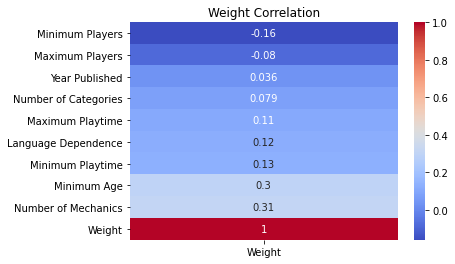

In [ ]:
# Heat map exploring the predictors of a game's Weight/Complexity Rating 
sns.heatmap(df.corr()[["Weight"]].sort_values("Weight"), cmap = "coolwarm", annot = True)
plt.title("Weight Correlation")
plt.show()

# Inference from the heat map indicates that the "Number of Mechanics" and the "Minimum Age" of the player are the biggest predictors of the games "Weight/Complexity Rating"
# More mechanics and a higher minimum age would result in the game receiving a higher complexity rating. 
# The minimum number of Players also seem indicative of the weight, with the larger the minimum number of players making the game less complex

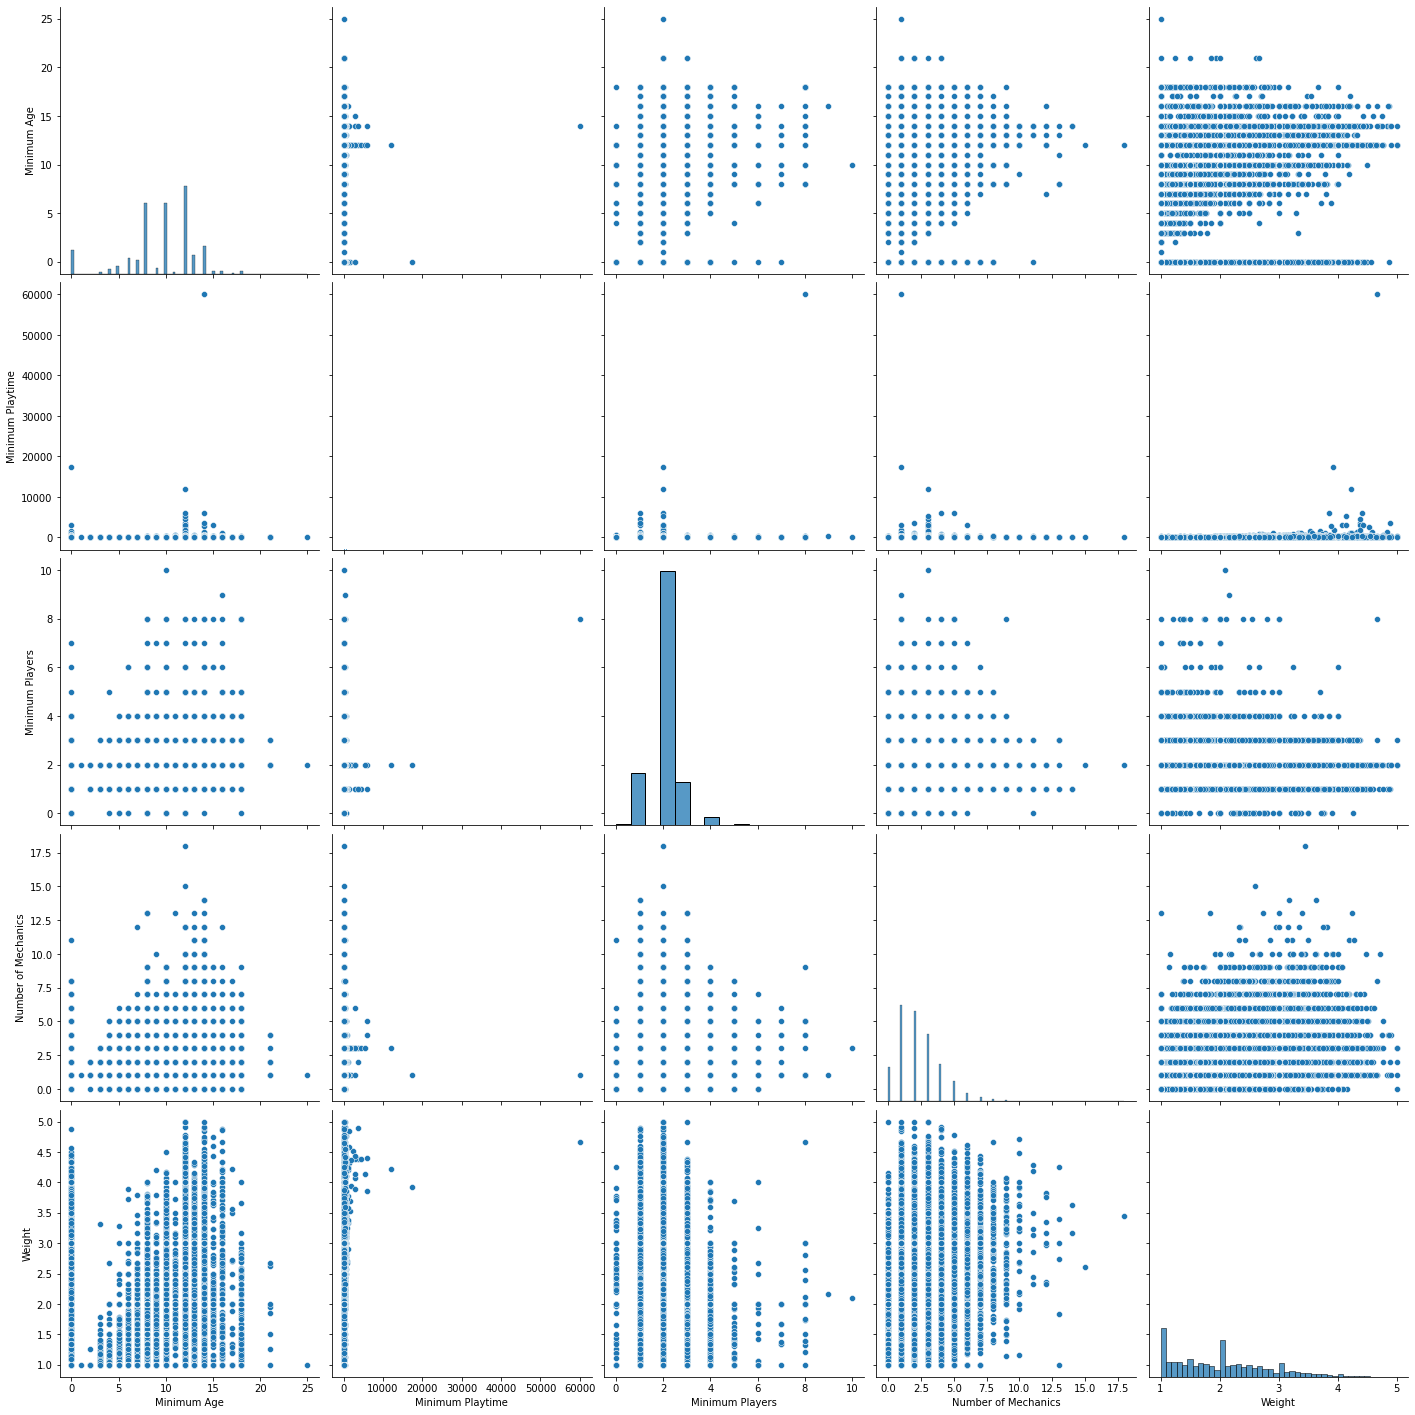

In [ ]:
# Pairplot for the relevant variables identified above 

sns.pairplot(df[["Minimum Age", "Minimum Playtime", "Minimum Players", "Number of Mechanics", "Weight"]], height = 4)

# Inference indicates some linearity between Weight and Minimum Players

Text(0, 0.5, 'Number of Games')

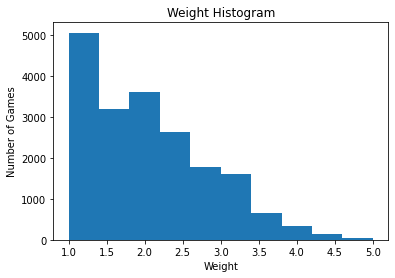

In [ ]:
# Plotting the distribution curve of the weight 

plt.hist(df["Weight"])
plt.title("Weight Histogram")
plt.xlabel("Weight")
plt.ylabel("Number of Games")

# there is right skew to the rating data, with games scoring closer to 1 than anyother score

Text(0, 0.5, 'Number of Games')

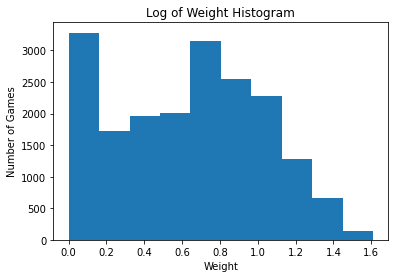

In [ ]:
# Plotting the log of the weight to achieve a normal distribution

plt.hist(np.log(df["Weight"]))
plt.title("Log of Weight Histogram")
plt.xlabel("Weight")
plt.ylabel("Number of Games")

In [ ]:
# Feature Engineering 

# - Lets clean the "boardgamemechanic" column to make things easier to break into dummy variables later

def clean_strings(feature):
  df[feature] = df[[feature]].applymap(lambda x: x.replace("'", ''))
  df[feature] = df[[feature]].applymap(lambda x: x.replace("[", ''))
  df[feature] = df[[feature]].applymap(lambda x: x.replace("]", ''))
  return df[feature].head()


In [ ]:
# Calling the function on the "boardgamemechanic" variable

clean_strings("boardgamemechanic")

0    Campaign / Battle Card Driven, Cooperative Gam...
1    Action Points, Cooperative Game, Hand Manageme...
2    Card Drafting, End Game Bonuses, Hand Manageme...
3    Action Points, Auction/Bidding, Auction: Dutch...
4    Hand Management, Income, Loans, Market, Networ...
Name: boardgamemechanic, dtype: object

In [ ]:
# Cleaning the "boardgamecategory" column to make things easier to break into dummy variables later 

clean_strings("boardgamecategory")

0    Adventure, Exploration, Fantasy, Fighting, Min...
1                               Environmental, Medical
2    Economic, Environmental, Industry / Manufactur...
3                    Card Game, Civilization, Economic
4    Economic, Industry / Manufacturing, Transporta...
Name: boardgamecategory, dtype: object

In [ ]:
from google.colab import drive # for more on writing and reading files through colab https://towardsdatascience.com/reading-and-writing-files-with-google-colaboratory-f0c234683946
drive.mount("/drive")

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
mechanics_df = pd.read_csv("/drive/My Drive/Colab Notebooks/mechanics.csv") # if you use the method above to save or load data through colab, you need to authorise everytime you use it

In [ ]:
mechanics = df["boardgamemechanic"].str.get_dummies(sep = ',')
mechanics.head()

,(Unknown),(Web published),Action / Dexterity,Action Points,Action Queue,Action Retrieval,Action/Event,Advantage Token,Adventure,American Revolutionary War,American West,Ancient,Animals,Arabian,Area Majority / Influence,Area Movement,Area-Impulse,Auction/Bidding,Auction: Dexterity,Auction: Dutch,Auction: Dutch Priority,Auction: English,Auction: Fixed Placement,Auction: Once Around,Auction: Sealed Bid,Auction: Turn Order Until Pass,Automatic Resource Growth,Aviation / Flight,Betting and Bluffing,Bias,Bluffing,Book,Bribery,Campaign / Battle Card Driven,Card Drafting,Card Game,Card Play Conflict Resolution,Catch the Leader,Chaining,Childrens Game,...,Science Fiction,Score-and-Reset Game,Secret Unit Deployment,Set Collection,Simulation,Simultaneous Action Selection,Singing,Solo / Solitaire Game,Splotter Spellen,Sports,Square Grid,Stacking and Balancing,Steve Jackson Games,Stock Holding,Storytelling,Tactic,Take That,Team-Based Game,The Avalon Hill Game Co,Thomas Sackl Spiele,Tile Placement,Time Track,Trading,Trains,Traitor Game,Transportation,Travel,Trick-taking,Trivia,Variable Phase Order,Variable Player Powers,Video Game Theme,Voting,Wargame,Word Game,Worker Placement,Zoch Verlag,Zombies,db-Spiele,u65b0u30dcu30fcu30c9u30b2u30fcu30e0u515a (New Board Game Party)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Lets trim the number of mechanics in the DataFrame from 482 to just 103 using the mechanics scrapped from the Board Game Geek website in the previous notebook

m_keys = mechanics.keys() # Getting a list of keys from the mechanics dataframe

m_keys = [x for x in m_keys if x in list(mechanics_df["mechanics"])] # Limiting the keys to those only in the mechanics list

mechanics = mechanics[m_keys] # Setting the dataframe to only include columns from the mechanics list

mechanics = mechanics.add_prefix("Mechanic ") # Adding a prefix to the columns to make  them easier to discern later

mechanics.head()

,Mechanic Acting,Mechanic Action Drafting,Mechanic Action Points,Mechanic Action Queue,Mechanic Action Retrieval,Mechanic Action Timer,Mechanic Action/Event,Mechanic Advantage Token,Mechanic Alliances,Mechanic Area Majority / Influence,Mechanic Area Movement,Mechanic Area-Impulse,Mechanic Auction/Bidding,Mechanic Auction: Sealed Bid,Mechanic Auction: Turn Order Until Pass,Mechanic Automatic Resource Growth,Mechanic Betting and Bluffing,Mechanic Bias,Mechanic Bribery,Mechanic Campaign / Battle Card Driven,Mechanic Card Drafting,Mechanic Catch the Leader,Mechanic Chaining,Mechanic Chit-Pull System,Mechanic Command Cards,Mechanic Commodity Speculation,Mechanic Communication Limits,Mechanic Connections,Mechanic Contracts,Mechanic Cooperative Game,Mechanic Crayon Rail System,Mechanic Critical Hits and Failures,Mechanic Deduction,Mechanic Dice Rolling,Mechanic Different Dice Movement,Mechanic Drafting,Mechanic Elapsed Real Time Ending,Mechanic Enclosure,Mechanic End Game Bonuses,Mechanic Events,...,Mechanic Ownership,Mechanic Paper-and-Pencil,Mechanic Pattern Building,Mechanic Pattern Recognition,Mechanic Physical Removal,Mechanic Pick-up and Deliver,Mechanic Player Elimination,Mechanic Player Judge,Mechanic Point to Point Movement,Mechanic Push Your Luck,Mechanic Race,Mechanic Real-Time,Mechanic Resource to Move,Mechanic Rock-Paper-Scissors,Mechanic Role Playing,Mechanic Roles with Asymmetric Information,Mechanic Roll / Spin and Move,Mechanic Rondel,Mechanic Score-and-Reset Game,Mechanic Secret Unit Deployment,Mechanic Set Collection,Mechanic Simulation,Mechanic Simultaneous Action Selection,Mechanic Singing,Mechanic Solo / Solitaire Game,Mechanic Square Grid,Mechanic Stacking and Balancing,Mechanic Stock Holding,Mechanic Storytelling,Mechanic Take That,Mechanic Team-Based Game,Mechanic Tile Placement,Mechanic Time Track,Mechanic Trading,Mechanic Traitor Game,Mechanic Trick-taking,Mechanic Variable Phase Order,Mechanic Variable Player Powers,Mechanic Voting,Mechanic Worker Placement
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
m_keys_final  = mechanics.keys()

In [ ]:
# Lets add the mechanics features to the original dataframe

df = pd.concat([df, mechanics], axis = 1, sort = False)

In [ ]:
categories = df["boardgamecategory"].str.get_dummies(sep = ',')

In [ ]:
category_df = pd.read_csv("/drive/My Drive/Colab Notebooks/categories.csv")

In [ ]:
# Getting keys of the categories dataframe

c_keys = categories.keys() # Limiting the categories to only those form the website

c_keys = [x for x in c_keys if x in list(category_df["categories"])] # Setting the dataframe to include only the categories from the website

categories = categories[c_keys] # adding the category prefix to all the columns to make them easier to discern later

categories = categories.add_prefix("Category")

In [ ]:
c_keys_final = categories.keys()

In [ ]:
# Lets also add the categories featues to the original dataframe

df = pd.concat([df, categories], axis = 1, sort = False) # this is the final dataframe with all the mechanics added into it

In [ ]:
df.head()

,name,Year Published,Minimum Players,Maximum Players,Minimum Playtime,Maximum Playtime,Minimum Age,Language Dependence,Number of Categories,Number of Mechanics,boardgamecategory,boardgamemechanic,description,Weight,Mechanic Acting,Mechanic Action Drafting,Mechanic Action Points,Mechanic Action Queue,Mechanic Action Retrieval,Mechanic Action Timer,Mechanic Action/Event,Mechanic Advantage Token,Mechanic Alliances,Mechanic Area Majority / Influence,Mechanic Area Movement,Mechanic Area-Impulse,Mechanic Auction/Bidding,Mechanic Auction: Sealed Bid,Mechanic Auction: Turn Order Until Pass,Mechanic Automatic Resource Growth,Mechanic Betting and Bluffing,Mechanic Bias,Mechanic Bribery,Mechanic Campaign / Battle Card Driven,Mechanic Card Drafting,Mechanic Catch the Leader,Mechanic Chaining,Mechanic Chit-Pull System,Mechanic Command Cards,Mechanic Commodity Speculation,...,CategoryMemory,CategoryMiniatures,CategoryModern Warfare,CategoryMovies / TV / Radio theme,CategoryMurder/Mystery,CategoryMusic,CategoryMythology,CategoryNapoleonic,CategoryNautical,CategoryNegotiation,CategoryNovel-based,CategoryNumber,CategoryParty Game,CategoryPike and Shot,CategoryPirates,CategoryPolitical,CategoryPost-Napoleonic,CategoryPrehistoric,CategoryPrint & Play,CategoryPuzzle,CategoryRacing,CategoryReal-time,CategoryReligious,CategoryRenaissance,CategoryScience Fiction,CategorySpace Exploration,CategorySpies/Secret Agents,CategorySports,CategoryTerritory Building,CategoryTrains,CategoryTransportation,CategoryTravel,CategoryTrivia,CategoryVideo Game Theme,CategoryVietnam War,CategoryWargame,CategoryWord Game,CategoryWorld War I,CategoryWorld War II,CategoryZombies
0,Gloomhaven,2017,1,4,60,120,12,4,5,12,"Adventure, Exploration, Fantasy, Fighting, Min...","Campaign / Battle Card Driven, Cooperative Gam...",Gloomhaven is a game of Euro-inspired tactica...,3.8078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Pandemic Legacy Season 1,2015,2,4,60,60,13,4,2,8,"Environmental, Medical","Action Points, Cooperative Game, Hand Manageme...",Pandemic Legacy is a co-operative campaign gam...,2.8301,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Terraforming Mars,2016,1,5,120,120,12,3,6,9,"Economic, Environmental, Industry / Manufactur...","Card Drafting, End Game Bonuses, Hand Manageme...","In the 2400s, mankind begins to terraform the ...",3.2313,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Through the Ages A New Story of Civilization,2015,2,4,120,120,14,4,3,5,"Card Game, Civilization, Economic","Action Points, Auction/Bidding, Auction: Dutch...",Through the Ages: A New Story of Civilization ...,4.3850,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Brass Birmingham,2018,2,4,60,120,14,1,3,8,"Economic, Industry / Manufacturing, Transporta...","Hand Management, Income, Loans, Market, Networ...",Brass: Birmingham is an economic strategy game...,3.9122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Setting masks for correlations 

m_keys_final = list(m_keys_final) + ["Weight"]
c_keys_final = list(c_keys_final) + ["Weight"]

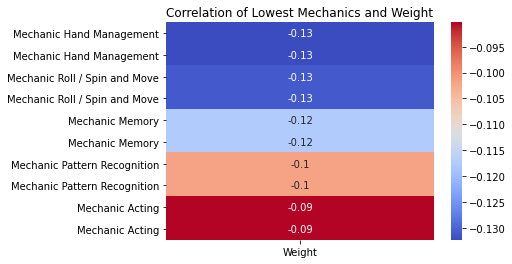

In [ ]:
# Some more heatmap

sns.heatmap(df[m_keys_final].corr()[["Weight"]].sort_values("Weight").head(10), cmap = "coolwarm", annot = True)
plt.title("Correlation of Lowest Mechanics and Weight")
plt.show()

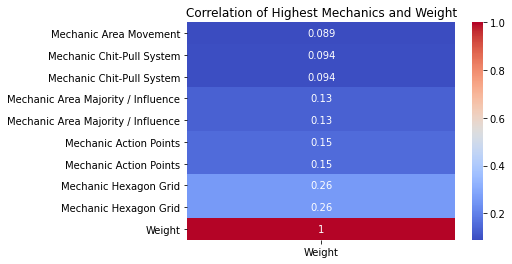

In [ ]:
sns.heatmap(df[m_keys_final].corr()[["Weight"]].sort_values("Weight").tail(10), cmap = "coolwarm", annot = True)
plt.title("Correlation of Highest Mechanics and Weight")
plt.show()

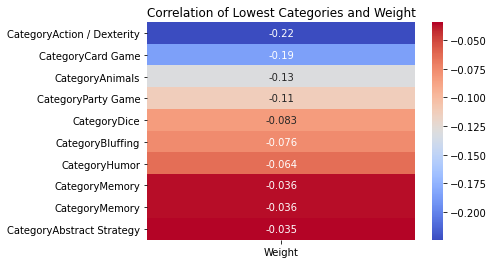

In [ ]:
sns.heatmap(df[c_keys_final].corr()[["Weight"]].sort_values("Weight").head(10), cmap = "coolwarm", annot = True)
plt.title("Correlation of Lowest Categories and Weight")
plt.show()

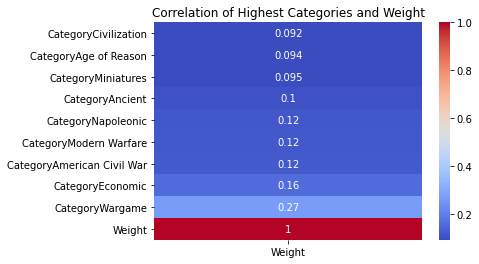

In [ ]:
sns.heatmap(df[c_keys_final].corr()[["Weight"]].sort_values("Weight").tail(10), cmap = "coolwarm", annot = True)
plt.title("Correlation of Highest Categories and Weight")
plt.show()

# Inference: some other categories are correlcated with weight/complexity rating, with war games having the biggest correlation with the rating. 

In [ ]:
from google.colab import drive # for more on writing and reading files through colab https://towardsdatascience.com/reading-and-writing-files-with-google-colaboratory-f0c234683946
drive.mount("/drive")

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
# Exporting the data to a csv file 

df.to_csv("/drive/My Drive/Colab Notebooks/final_game_board_dataset.csv", index = False)